-----------------------

SECTION 1: Importing modules 
------------
-----------------

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


-----------------------------------
SECTION 2: Loading the dataset
---------------------
--------------------------

In [42]:
url = "C:\\Users\\Alpana\\Desktop\\project\\IRIS flower detection\\Iris flower.csv"
df = pd.read_csv(url)


---------------------
SECTION 2: Basic information about the dataset 
------------
-----------

In [43]:
df.head()

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
df.tail()

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               150 non-null    int64  
 1   Sepal Length Cm  150 non-null    float64
 2   Sepal Width Cm   150 non-null    float64
 3   Petal Length Cm  150 non-null    float64
 4   Petal Width Cm   150 non-null    float64
 5   Species          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
# statistical summary 
df.describe()

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
# Number of samples in each species 
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

------------------
SECTION 3: DATA PRE - PROCESSING 
---------------------
----------------------

In [48]:
# checking and replacing null values if there is any 
df.isnull().sum()


Id                 0
Sepal Length Cm    0
Sepal Width Cm     0
Petal Length Cm    0
Petal Width Cm     0
Species            0
dtype: int64

-----------------------
SECTION 4: visualization 
------------
--------------

**4.1 Histogram**

<Axes: >

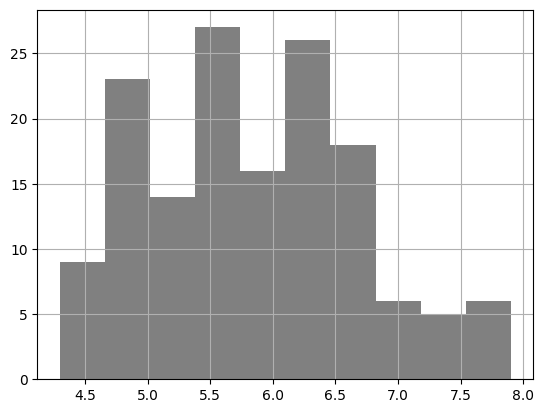

In [49]:
df['Sepal Length Cm'].hist(color = 'grey')

Here we have normal distribution 

<Axes: >

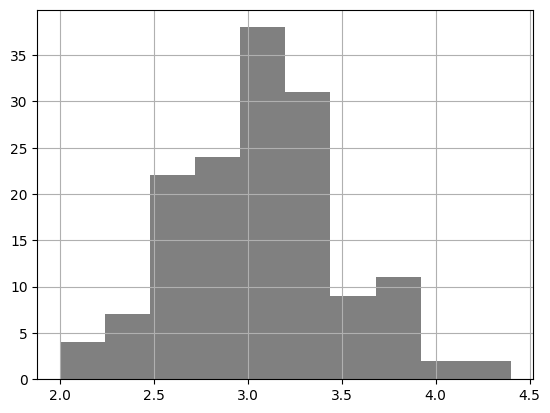

In [50]:
df['Sepal Width Cm'].hist(color = 'grey')

Here also we have normal distribution which mean the model can quickly learn from the data 
 

<Axes: >

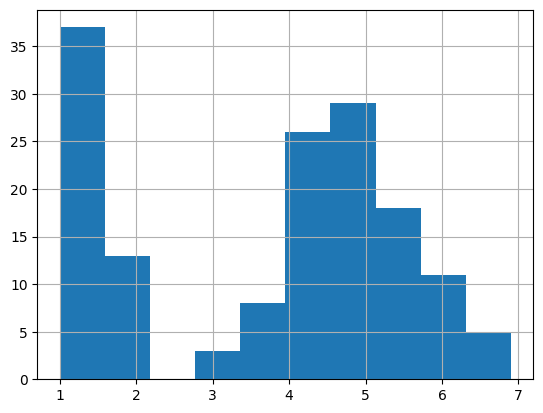

In [51]:
df['Petal Length Cm'].hist()

<Axes: >

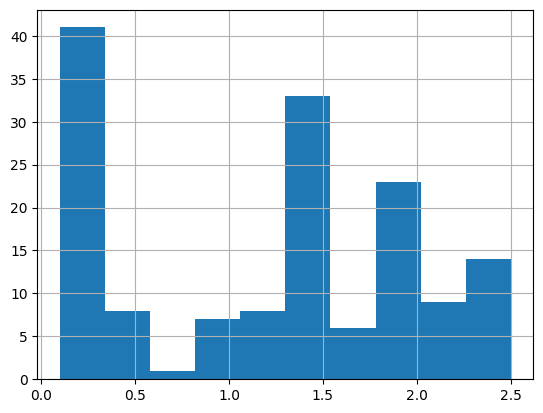

In [52]:
df['Petal Width Cm'].hist()

**4.2 Scatter plot**

In [53]:
colours = ['blue', 'green','orange']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


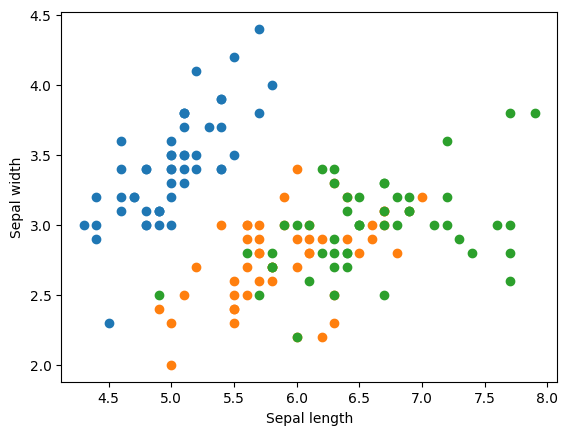

In [54]:
for j in range (3):
    x = df[df['Species'] == species[j]]
    plt.scatter(x['Sepal Length Cm'], x['Sepal Width Cm']) 
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')


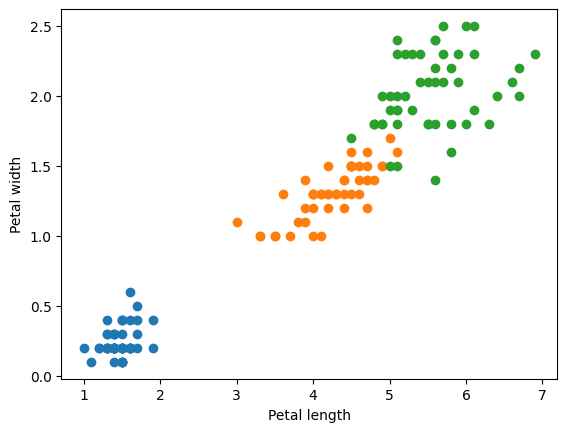

In [55]:
for i in range (3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal Length Cm'], x['Petal Width Cm']) 
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')


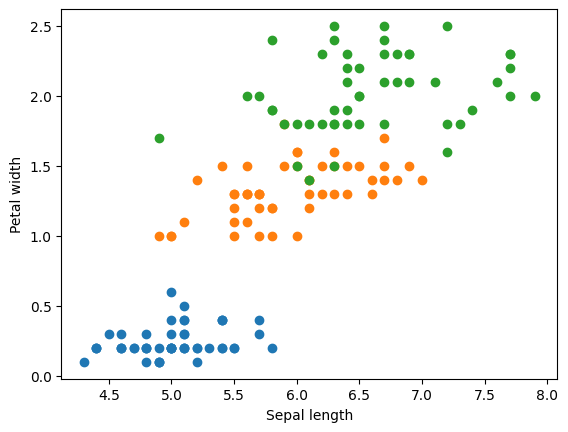

In [56]:
for j in range (3):
    x = df[df['Species'] == species[j]]
    plt.scatter(x['Sepal Length Cm'], x['Petal Width Cm']) 
    plt.xlabel('Sepal length')
    plt.ylabel('Petal width')


In [57]:

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the "Species" column
df["Species"] = label_encoder.fit_transform(df["Species"])





CORELATION MATRIX 
-----------
-----------


In [58]:
df.corr()

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
Sepal Length Cm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width Cm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal Length Cm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal Width Cm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

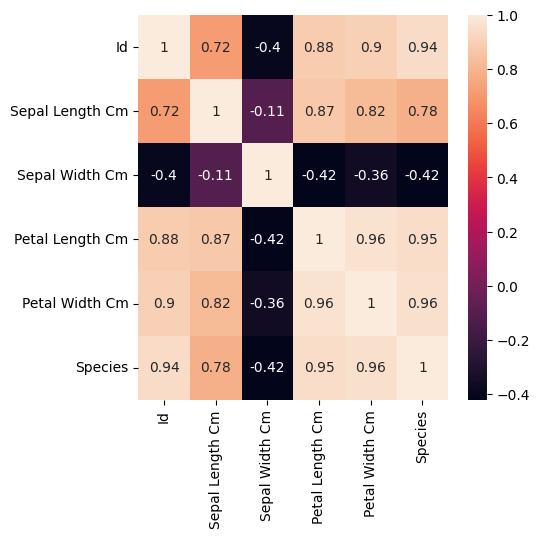

In [59]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True, ax = ax)

# LABEL ENCODER
    -   CONVERTING LABELS INTO NUMERIC FORM
-------------------
--------------------

In [60]:
le = LabelEncoder()

In [61]:
df['Species'] = le.fit_transform(df['Species'])
df.head()


,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


MODEL TRAINING
-----------------
-----------------


- train - 70% of data 
- test - 30% of data


In [62]:
X = df.drop(columns= ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)

LOGISTIC REGRESSION 

In [63]:
model = LogisticRegression(max_iter= 500)

In [64]:
# Model training
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

metric to get performance 

In [65]:
print("Accuracy: ", model.score(x_test,y_test))

Accuracy:  1.0


# KNN

In [66]:
model = KNeighborsClassifier()

In [67]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [68]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


# decision tree

In [69]:
model = DecisionTreeClassifier()

In [70]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0
